In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# train dataset

train_df=pd.read_csv("Train.csv")

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print("train dataset (row,column):",train_df.shape)

train dataset (row,column): (8523, 12)


In [5]:
# test dataset

test_df=pd.read_csv("Test.csv")

In [6]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
print("test dataset (row,column):",test_df.shape)

test dataset (row,column): (5681, 11)


In [8]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\HP-PC\AppData\Local\Temp\ipykernel_2620\3666586272.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMat=train_df.corr()


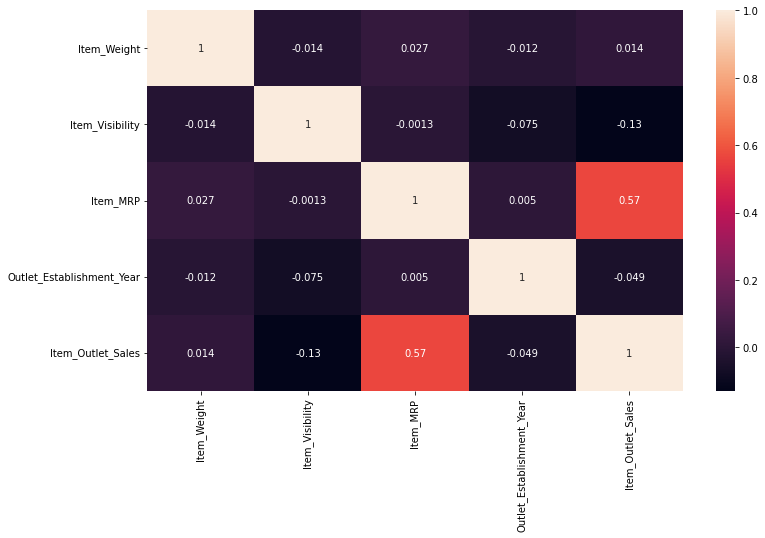

In [9]:
# correlation within features

plt.figure(figsize=(12,7))
corrMat=train_df.corr()
sns.heatmap(corrMat,annot=True)
plt.show()

# Feature Engineering

In [10]:
train_df.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [11]:
test_df.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


# Handling Missing Value

In [14]:
train_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_Weight

In [16]:
train_df["Item_Weight"]=train_df["Item_Weight"].median()

In [17]:
test_df["Item_Weight"]=test_df["Item_Weight"].median()

In [18]:
train_df["Item_Weight"].fillna(value=train_df["Item_Weight"],inplace=True)

In [19]:
test_df["Item_Weight"].fillna(value=test_df["Item_Weight"],inplace=True)

# Outlet_Size

In [20]:
train_df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [21]:
train_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:

train_df['Outlet_Size'].fillna(value=train_df['Outlet_Size'].mode()[0],inplace=True)


In [23]:
train_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
test_df["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [25]:
test_df["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [26]:
test_df["Outlet_Size"].fillna(value=test_df["Outlet_Size"].mode()[0],inplace=True) 


In [27]:
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# working with 'Item_Fat_Content'...

In [28]:
train_df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
train_df.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)


In [30]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.6,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,12.6,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,12.6,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,12.6,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,12.6,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
test_df["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [32]:
test_df.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)


In [33]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.5,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,12.5,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,12.5,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,12.5,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.5,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


Label Encoding Using Category Codes.

Item_Fat_Content.

In [34]:
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].astype("category")
train_df["Item_Fat_Content"].dtypes


CategoricalDtype(categories=['Low Fat', 'Regular'], ordered=False)

In [35]:

train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].cat.codes

In [36]:
train_df["Item_Fat_Content"].dtypes

dtype('int8')

In [37]:
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].astype("category")
test_df["Item_Fat_Content"].dtypes

CategoricalDtype(categories=['Low Fat', 'Regular'], ordered=False)

In [38]:
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].cat.codes


In [39]:
test_df["Item_Fat_Content"].dtypes

dtype('int8')

Working with 'Item_Type'..

In [46]:
#.head for using:
train_df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.6,0,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,12.6,1,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [47]:
train_df["Item_Type"].unique()

['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']

In [49]:
# Ext.
train_df["Item_Type"].value_counts().sum()

8523

In [45]:
# train_df Converting to category:
train_df["Item_Type"]=train_df["Item_Type"].astype("category")
train_df["Item_Type"].dtypes

CategoricalDtype(categories=['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
                  'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
                  'Health and Hygiene', 'Household', 'Meat', 'Others',
                  'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
, ordered=False)

In [50]:

train_df["Item_Type"]=train_df["Item_Type"].cat.codes

In [51]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.6,0,0.016047,4,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,12.6,1,0.019278,14,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,12.6,0,0.016760,10,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,12.6,1,0.000000,6,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,12.6,0,0.000000,9,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
# test_df converting to category:
test_df["Item_Type"]=test_df["Item_Type"].astype("category")
test_df["Item_Type"].dtypes

CategoricalDtype(categories=['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
                  'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
                  'Health and Hygiene', 'Household', 'Meat', 'Others',
                  'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
, ordered=False)

In [53]:

test_df["Item_Type"]=test_df["Item_Type"].cat.codes

Working with 'Outlet_Size'..

In [54]:

train_df["Outlet_Size"]=train_df["Outlet_Size"].astype("category")
train_df["Outlet_Size"].dtypes

CategoricalDtype(categories=['High', 'Medium', 'Small'], ordered=False)

In [55]:
train_df["Outlet_Size"]=train_df["Outlet_Size"].cat.codes

In [56]:

test_df["Outlet_Size"]=test_df["Outlet_Size"].astype("category")
test_df["Outlet_Size"].dtypes

CategoricalDtype(categories=['High', 'Medium', 'Small'], ordered=False)

In [57]:
test_df["Outlet_Size"]=test_df["Outlet_Size"].cat.codes

Working with 'Outlet_Location_Type'..

In [58]:
train_df["Outlet_Location_Type"]=train_df["Outlet_Location_Type"].astype("category")
train_df["Outlet_Location_Type"].dtypes

CategoricalDtype(categories=['Tier 1', 'Tier 2', 'Tier 3'], ordered=False)

In [59]:
train_df["Outlet_Location_Type"]=train_df["Outlet_Location_Type"].cat.codes

In [60]:
test_df["Outlet_Location_Type"]=test_df["Outlet_Location_Type"].astype("category")
test_df["Outlet_Location_Type"].dtypes

CategoricalDtype(categories=['Tier 1', 'Tier 2', 'Tier 3'], ordered=False)

In [61]:
test_df["Outlet_Location_Type"]=test_df["Outlet_Location_Type"].cat.codes

Working with 'Outlet_Type'..

In [62]:
train_df["Outlet_Type"]=train_df["Outlet_Type"].astype("category")
train_df["Outlet_Type"].dtypes

CategoricalDtype(categories=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
                  'Supermarket Type3'],
, ordered=False)

In [63]:

train_df["Outlet_Type"]=train_df["Outlet_Type"].cat.codes

In [64]:
train_df["Outlet_Type"].unique()

array([1, 2, 0, 3], dtype=int8)

In [65]:
test_df["Outlet_Type"]=test_df["Outlet_Type"].astype("category")
test_df["Outlet_Type"].dtypes

CategoricalDtype(categories=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
                  'Supermarket Type3'],
, ordered=False)

In [66]:
test_df["Outlet_Type"]=test_df["Outlet_Type"].cat.codes

In [67]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.6,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,12.6,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,12.6,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,12.6,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,12.6,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [69]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.5,0,0.007565,13,107.8622,1999,1,0,1
1,12.5,1,0.038428,4,87.3198,2007,1,1,1
2,12.5,0,0.099575,11,241.7538,1998,1,2,0
3,12.5,0,0.015388,13,155.0340,2007,1,1,1
4,12.5,1,0.118599,4,234.2300,1985,1,2,3


In [70]:
train_df.to_csv("featured_train.csv")
test_df.to_csv("featured_test.csv")